In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataPath = 'mens-machine-learning-competition-2019\\'
df_detailedResults = pd.read_csv(dataPath + "NCAATourneyDetailedResults.csv")
df_teams = pd.read_csv( dataPath + "Teams.csv")
df_regularSeason = pd.read_csv(dataPath + "RegularSeasonDetailedResults.csv")
df_seeds = pd.read_csv(dataPath + "NCAATourneySeeds.csv")

In [3]:
df_detailedResults.head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
5,2003,136,1163,58,1140,53,N,0,17,52,...,17,11,13,15,26,11,11,8,4,22
6,2003,136,1181,67,1161,57,N,0,19,54,...,11,18,22,11,24,8,19,5,4,19
7,2003,136,1211,74,1153,69,N,0,20,47,...,27,7,10,13,22,13,10,7,6,24
8,2003,136,1228,65,1443,60,N,0,24,56,...,24,8,13,17,18,10,14,6,5,16
9,2003,136,1242,64,1429,61,N,0,28,51,...,17,9,10,13,19,13,13,6,1,15


In [4]:
df_teams.head(10)

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2019
1,1102,Air Force,1985,2019
2,1103,Akron,1985,2019
3,1104,Alabama,1985,2019
4,1105,Alabama A&M,2000,2019
5,1106,Alabama St,1985,2019
6,1107,Albany NY,2000,2019
7,1108,Alcorn St,1985,2019
8,1109,Alliant Intl,1985,1991
9,1110,American Univ,1985,2019


In [5]:
df_regularSeason.head(10)

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
5,2003,11,1458,81,1186,55,H,0,26,57,...,11,12,17,6,22,8,19,4,3,25
6,2003,12,1161,80,1236,62,H,0,23,55,...,15,20,28,9,21,11,30,10,4,28
7,2003,12,1186,75,1457,61,N,0,28,62,...,17,17,23,8,25,10,15,14,8,18
8,2003,12,1194,71,1156,66,N,0,28,58,...,18,12,27,13,26,13,25,8,2,18
9,2003,12,1458,84,1296,56,H,0,32,67,...,14,7,12,9,23,10,18,1,3,18


In [6]:
df_seeds_cleaned = df_seeds.loc[:, ['TeamID', 'Season', 'Seed']]
df_teams_cleaned = df_teams.iloc[:,:2]

In [7]:
df_seeds_cleaned.head(10)

,TeamID,Season,Seed
0,1207,1985,W01
1,1210,1985,W02
2,1228,1985,W03
3,1260,1985,W04
4,1374,1985,W05
5,1208,1985,W06
6,1393,1985,W07
7,1396,1985,W08
8,1439,1985,W09
9,1177,1985,W10


In [8]:
def getSeedNum(seed):
    seedInt = int(seed[1:3])
    
    return seedInt

def getSeedRegion(seed):
    region = seed[0:1]
    return region

In [9]:
df_seeds_cleaned['seed_num'] = df_seeds_cleaned['Seed'].apply(lambda x: getSeedNum(x))
df_seeds_cleaned['seed_region'] = df_seeds_cleaned['Seed'].apply(lambda x: getSeedRegion(x))
df_seeds_cleaned['top_seeded'] = np.where(df_seeds_cleaned['Seed'].isnull(), 0, 1)
df_seeds_cleaned.drop(columns=['Seed'], inplace=True)

In [10]:
df_seeds_cleaned.head(10)

,TeamID,Season,seed_num,seed_region,top_seeded
0,1207,1985,1,W,1
1,1210,1985,2,W,1
2,1228,1985,3,W,1
3,1260,1985,4,W,1
4,1374,1985,5,W,1
5,1208,1985,6,W,1
6,1393,1985,7,W,1
7,1396,1985,8,W,1
8,1439,1985,9,W,1
9,1177,1985,10,W,1


In [11]:
teamSeason = df_detailedResults.groupby("WTeamID")['Season'].count()
winners = teamSeason.sort_values(ascending=False).iloc[:20]
winners = winners.to_frame().merge(df_teams[['TeamID', 'TeamName']], how='left', left_index=True, right_on='TeamID')
winners.head(10)

,Season,TeamID,TeamName
213,43,1314,North Carolina
141,42,1242,Kansas
145,37,1246,Kentucky
80,36,1181,Duke
176,32,1277,Michigan St
95,31,1196,Florida
62,29,1163,Connecticut
357,28,1458,Wisconsin
292,28,1393,Syracuse
156,28,1257,Louisville


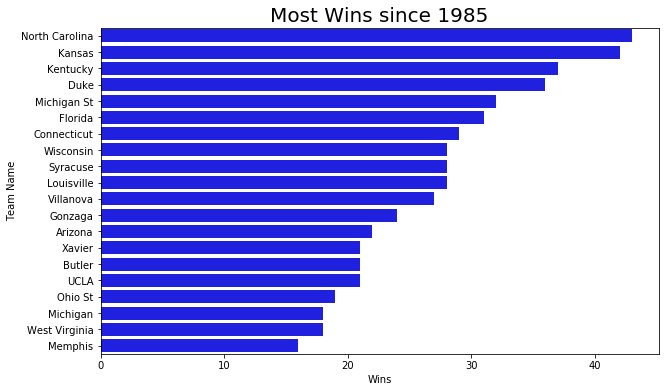

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(y=winners.TeamName, x=winners.Season, orient='h', color='b')
plt.xlabel('Wins')
plt.ylabel('Team Name')
plt.title('Most Wins since 1985', size=20)
plt.show()

In [13]:
df_regularSeason_stats = pd.DataFrame()
df_regularSeason_winners = df_regularSeason.copy()

In [14]:
# Convert regular season stats into stats per winning team
df_regularSeason_winners['poss'] = df_regularSeason_winners['WFGA'] + 0.475 * df_regularSeason_winners['WFTA'] - df_regularSeason_winners['WOR'] + df_regularSeason['WTO']
df_regularSeason_winners['op_poss'] = df_regularSeason_winners['LFGA'] + 0.475 * df_regularSeason_winners['LFTA'] - df_regularSeason_winners['LOR'] + df_regularSeason['LTO']
df_regularSeason_winners['off_rating'] = 100*(df_regularSeason_winners['WScore'] / df_regularSeason_winners['poss'])
df_regularSeason_winners['def_rating'] = 100*(df_regularSeason_winners['LScore'] / df_regularSeason_winners['op_poss'])
df_regularSeason_winners['net_rating'] = df_regularSeason_winners['off_rating'] - df_regularSeason_winners['def_rating']
df_regularSeason_winners['pace'] = 48 * ((df_regularSeason_winners['poss'] + df_regularSeason_winners['op_poss']) / ( 2 * ( 240 / 5 )))

df_rs_in = df_regularSeason_winners.rename(columns={'WTeamID':'TeamID', 'Wloc':'Loc', 
                                 'LTeamID':'TeamID_op', 'WScore':'ScoreLeft', 'LScore':'ScoreRight'})

seeds_opp = df_seeds_cleaned.rename(columns={'TeamID':'TeamID_op',
                                              'seed_num':'seed_int_op',
                                              'seed_region':'seed_region_op',
                                              'top_seeded':'top_seeded_teams_op'})

df_winners = pd.merge(left=df_rs_in, right=df_seeds_cleaned, how='left', on=['Season', 'TeamID'])
df_winners = pd.merge(left=df_winners, right=seeds_opp, how='left', on=['Season', 'TeamID_op'])
df_winners = pd.merge(left=df_winners, right=df_teams_cleaned, how='left', on=['TeamID'])

df_winners['DayNum']= pd.to_numeric(df_winners['DayNum'])
df_winners['win'] = 1
df_winners['seed_num'] = np.where(df_winners['seed_num'].isnull(), 20, df_winners['seed_num'])
df_winners['seed_region'] = np.where(df_winners['seed_region'].isnull(), "NoTour", df_winners['seed_region'])

# df_out['top_seeded_teams'] = np.where(df_out['top_seeded_teams'].isnull(), 0, df_out['top_seeded_teams'])

df_winners['seed_int_op'] = np.where(df_winners['seed_int_op'].isnull(), 20, df_winners['seed_int_op'])
df_winners['seed_region_op'] = np.where(df_winners['seed_region_op'].isnull(), 'NoTour', df_winners['seed_region_op'])
df_winners['top_seeded_teams_op'] = np.where(df_winners['top_seeded_teams_op'].isnull(), 0, df_winners['top_seeded_teams_op'])


In [15]:
df_winners.head()

,Season,DayNum,TeamID,ScoreLeft,TeamID_op,ScoreRight,WLoc,NumOT,WFGM,WFGA,...,net_rating,pace,seed_num,seed_region,top_seeded,seed_int_op,seed_region_op,top_seeded_teams_op,TeamName,win
0,2003,10,1104,68,1328,62,N,0,27,58,...,3.232650,73.5000,10.0,Y,1.0,1.0,W,1.0,Alabama,1
1,2003,10,1272,70,1393,63,N,0,26,62,...,9.441729,68.7625,7.0,Z,1.0,3.0,W,1.0,Memphis,1
2,2003,11,1266,73,1437,61,N,0,24,58,...,18.743237,64.8500,3.0,Y,1.0,20.0,NoTour,0.0,Marquette,1
3,2003,11,1296,56,1457,50,N,0,18,38,...,9.338222,58.4250,20.0,NoTour,NaN,20.0,NoTour,0.0,N Illinois,1
4,2003,11,1400,77,1208,71,N,0,30,61,...,8.742741,64.0000,1.0,X,1.0,20.0,NoTour,0.0,Texas,1


In [19]:
seeds_opp.head()

,TeamID_op,Season,seed_int_op,seed_region_op,top_seeded_teams_op
0,1207,1985,1,W,1
1,1210,1985,2,W,1
2,1228,1985,3,W,1
3,1260,1985,4,W,1
4,1374,1985,5,W,1


In [24]:
# Convert regular season information into per losing team information
df_regularSeason_losers = df_regularSeason.copy()

df_regularSeason_losers['poss'] = df_regularSeason_losers['LFGA'] + (0.475 * df_regularSeason_losers['LFTA']) - df_regularSeason_losers['LOR'] + df_regularSeason_losers['LTO']
df_regularSeason_losers['opp_poss'] = df_regularSeason_losers['WFGA'] + (0.475 * df_regularSeason_losers['WFTA']) - df_regularSeason_losers['WOR'] + df_regularSeason_losers['WTO']
df_regularSeason_losers['off_rating'] = 100*(df_regularSeason_losers['LScore'] / df_regularSeason_losers['poss'])
df_regularSeason_losers['def_rating'] = 100*(df_regularSeason_losers['WScore'] / df_regularSeason_losers['opp_poss'])
df_regularSeason_losers['net_rating'] = df_regularSeason_losers['off_rating'] - df_regularSeason_losers['def_rating']
df_regularSeason_losers['pace'] = 48*((df_regularSeason_losers['poss'] + df_regularSeason_losers['opp_poss'])/(2*(240/5)))

df_regularSeason_losers.rename(columns={'LTeamID':'TeamID', 
                              'LLoc':'_Loc',
                              'WTeamID':'TeamID_op',
                              'LScore':'Score_left', 
                              'WScore':'Score_right'}, inplace=True)

# seeds_opp = df_seeds_cleaned.rename(columns={'TeamID':'TeamID_op',
#                                               'seed_num':'seed_int_op',
#                                               'seed_region':'seed_region_op',
#                                               'top_seeded':'top_seeded_teams_op'})

df_losers = pd.merge(left=df_regularSeason_losers, right=df_seeds_cleaned, how='left', on=['Season', 'TeamID'])
df_losers = pd.merge(left=df_losers, right=seeds_opp, how='left', on=['Season', 'TeamID_op'])
df_losers = pd.merge(left=df_losers, right=df_teams_cleaned, how='left', on=['TeamID'])

df_losers['DayNum'] = pd.to_numeric(df_losers['DayNum'])
df_losers['win_dummy'] = 0

df_losers['seed_num'] = np.where(df_losers['seed_num'].isnull(), 20, df_losers['seed_num'])
df_losers['seed_region'] = np.where(df_losers['seed_region'].isnull(), 'NoTour', df_losers['seed_region'])
df_losers['top_seeded_teams'] = np.where(df_losers['top_seeded_teams_op'].isnull(), 0, df_losers['top_seeded_teams_op'])

df_losers['seed_int_op'] = np.where(df_losers['seed_int_op'].isnull(), 20, df_losers['seed_int_op'])
df_losers['seed_region_op'] = np.where(df_losers['seed_region_op'].isnull(), 'NoTour', df_losers['seed_region_op'])
df_losers['top_seeded_teams_op'] = np.where(df_losers['top_seeded_teams_op'].isnull(), 0, df_losers['top_seeded_teams_op'])

In [25]:
df_losers.head()

,Season,DayNum,TeamID_op,Score_right,TeamID,Score_left,WLoc,NumOT,WFGM,WFGA,...,pace,seed_num,seed_region,top_seeded,seed_int_op,seed_region_op,top_seeded_teams_op,TeamName,win_dummy,top_seeded_teams
0,2003,10,1104,68,1328,62,N,0,27,58,...,73.5000,1.0,W,1.0,10.0,Y,1.0,Oklahoma,0,1.0
1,2003,10,1272,70,1393,63,N,0,26,62,...,68.7625,3.0,W,1.0,7.0,Z,1.0,Syracuse,0,1.0
2,2003,11,1266,73,1437,61,N,0,24,58,...,64.8500,20.0,NoTour,NaN,3.0,Y,1.0,Villanova,0,1.0
3,2003,11,1296,56,1457,50,N,0,18,38,...,58.4250,20.0,NoTour,NaN,20.0,NoTour,0.0,Winthrop,0,0.0
4,2003,11,1400,77,1208,71,N,0,30,61,...,64.0000,20.0,NoTour,NaN,1.0,X,1.0,Georgia,0,1.0
